## Descarga de imágenes desde GEE

In [1]:
import ee
ee.Authenticate()

import collections
collections.Callable = collections.abc.Callable
ee.Initialize()


Successfully saved authorization token.


### Cargando librerías necesarias y estableciendo área de trabajo

In [1]:
import pandas as pd
import geopandas as gpd
import geemap.eefolium as geemap

<AxesSubplot:>

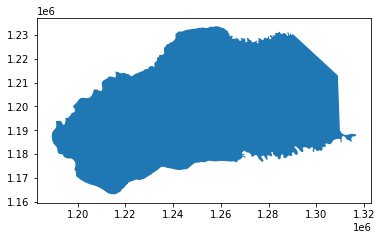

In [2]:
df = gpd.read_file('D:/Drive/Programación/R/R SIG/Biomasa Aérea con imágenes SAR y R/Datos/Tame/Tame.shp', encoding = 'utf-8')
df.plot()

In [3]:
df = df.to_crs(epsg=4326)
df

,OBJECTID_1,nom_munici,cod_depto,nombre_dep,Shape_Leng,Shape_Area,geometry
0,262.0,TAME,81,ARAUCA,418107.073815,5.383997e+09,"POLYGON ((-72.31545 6.35717, -72.31442 6.35756..."


### Obteniendo imagen

Se obtienen imágenes de:
- Mosaico anual (HH - HV): JAXA/ALOS/PALSAR/YEARLY/SAR
- Bosque/no bosque: JAXA/ALOS/PALSAR/YEARLY/FNF
- Biomasa aérea (2010): NASA/ORNL/biomass_carbon_density/v1

In [35]:
geometry = geemap.geopandas_to_ee(df).geometry()
imagen = ee.ImageCollection("JAXA/ALOS/PALSAR/YEARLY/SAR").filter(ee.Filter.date('2010-01-01', '2010-12-31')).first()
print(imagen.propertyNames().getInfo())

C:\tools\Anaconda3\envs\gee\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


['system:time_start', 'system:footprint', 'system:version', 'system:id', 'system:asset_size', 'system:index', 'system:bands', 'system:band_names']


In [36]:
info = {'Fecha de adiquisión': [imagen.get('system:index').getInfo()],
        'Bandas': [imagen.get('system:band_names').getInfo()]}
pd.DataFrame(info)

,Fecha de adiquisión,Bandas
0,2010,"[HH, HV, angle, date, qa]"


### Seleccionando bandas de interés y descargando la imagen

In [37]:
bandas = imagen.select(["HH", "HV"])
task_config = {
    'scale': 25,
    'region': geometry,
    'folder': 'Imágenes'
    }

#geemap.ee_export_image_to_drive(landsat, 'bht_ocaña2', **task_config)
task = ee.batch.Export.image(bandas, 'Mosaico', task_config)
task.start()